## Makine Öğrenimi Kullanarak Asteroitleri Potansiyel Tehlike Olarak Sınıflandırma

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [108]:
data = pd.read_csv("dataset.csv")

C:\Users\Beyza\AppData\Local\Temp\ipykernel_8104\2417667175.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset.csv")


* Veri setinde 958,542 satır, 45 sütun var
* Veri setinde object, int64, float64 gibi değişik veri tiplerinde değerler var
* Bazı sütunlarda boş değerler var
* Prefix sütunu neredeyse tamamen boş

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [110]:
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [111]:
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


## Bazı Sütun İsimlerinin Açıklaması
* neo       : Dünya'ya Yakın Obje, asteroitin yörüngesi Dünya'nın yakınından geçiyorsa o asteroit neo olarak sınıflandırılır
* pha       : Potansiyel Tehlikeli Asteroit, büyüklüğüne veya yörüngesine göre potansiyel olarak tehlikeli asteroit olarak sınıflandırılabilirler
* H         : Mutlak Parlaklık Parametresi, asteroitin 1 astronomik birim (AU) mesafeden gözlemlenen parlaklığını temsil eder. Farklı asteroidlerin Dünya'ya olan uzaklığını hesaplamak için kullanılır
* diameter  : Asteroitin kilometre cinsinden ölçülen tahmini çapıdır
* albedo    : Asteroit yüzeyinin ne kadar yansıtıcı olduğunun bir ölçüsüdür. Asteroitin yansıttığı ışık miktarının aldığı ışık miktarına oranıdır.
* moid      : Dünya'nın Minimum Yörünge Kesişme Mesafesi, asteroitin yörüngesi ile Dünya'nın yörüngesi arasındaki en yakın mesafedir. Bu, iki yörüngenin birbirine ne kadar yakınlaştığının bir ölçüsüdür
* class     : Bu, asteroitin spektral sınıfı veya türü gibi ait olduğu bir sınıflandırmayı veya kategoriyi temsil eder
* rms       : Ortalama Karekök, asteroitin yörüngesinin gözlemlenen verilere uygunluğunun göstergesidir

* diameter_sigma, sigma_e, sigma_a vs. : Asteroitin belirsizliğini ölçer. Yani çap, hız veya konum gibi ölçülen çeşitli parametrelerle ilişkili, bu ölçümlerdeki güven veya güvenilirlik derecesini gösteren aralığı ifade eder.


In [112]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

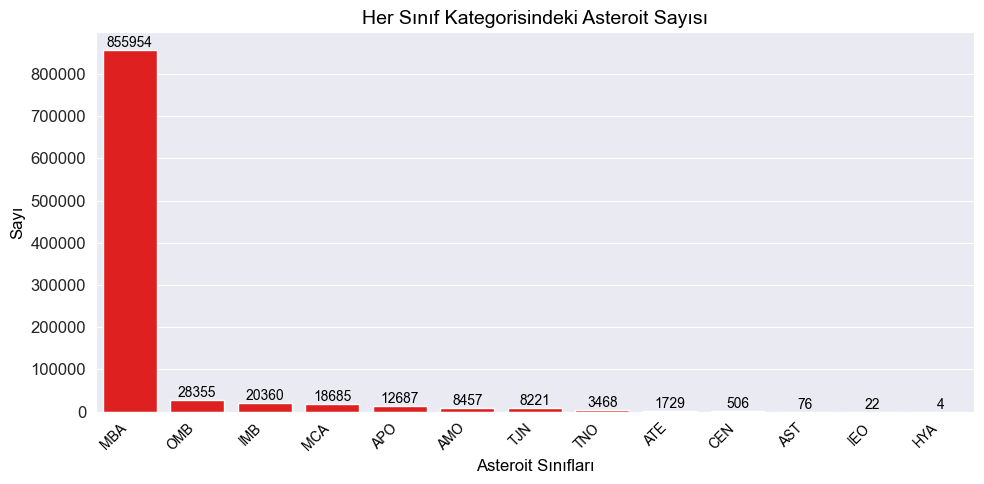

In [113]:
sns.set_style("darkgrid")
class_counts = data["class"].value_counts()
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, color='red')  # Change color to bright red
plt.xlabel("Asteroit Sınıfları", fontsize=12, fontweight='normal', fontfamily='sans-serif', color='black')
plt.ylabel("Sayı", fontsize=12, fontweight='normal', fontfamily='sans-serif', color='black')
plt.title("Her Sınıf Kategorisindeki Asteroit Sayısı", fontsize=14, fontweight='normal', fontfamily='sans-serif', color='black')
plt.xticks(rotation=45, ha="right", fontsize=10, fontweight='normal', fontfamily='sans-serif', color='black')
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.tight_layout()
plt.show()

Asteroidlerin büyük bir kısmının MBA sınıfında olduğunu görüyoruz.

MBA, ana kemer asteroiti anlamına gelir. Ana Kemer, Mars Ve Jüpiter arasındaki asteroitleri bulundurur.

Bilinen asteroitlerin çoğunluğu bu kemerdeki yörüngelerinde döner. 

Kemerin, çapı 1 kilometreden daha büyük 1,1 ila 1,9 milyon asteroit içerdiği tahmin ediliyor.

<img src="asteroid-belt.webp" alt="asteroid belt" width="400"/>

In [114]:
data.groupby("class")["pha"].value_counts().reset_index()

,class,pha,count
0,AMO,N,8338
1,AMO,Y,118
2,APO,N,10919
3,APO,Y,1768
4,AST,N,75
5,ATE,N,1555
6,ATE,Y,174
7,CEN,N,504
8,HYA,N,4
9,IEO,N,16


In [115]:
data[data["pha"] == "Y"].groupby("class")["pha"].value_counts().reset_index()

,class,pha,count
0,AMO,Y,118
1,APO,Y,1768
2,ATE,Y,174
3,IEO,Y,6


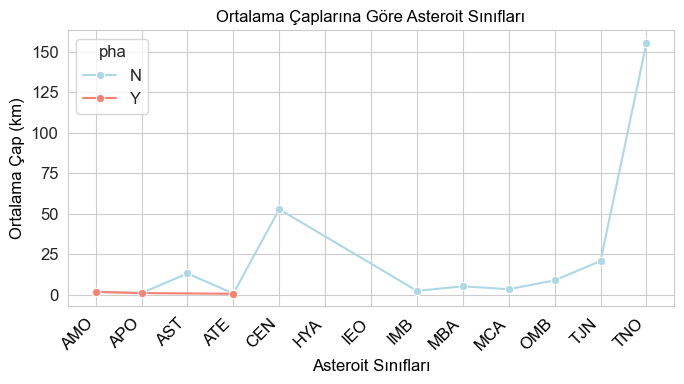

In [116]:
sns.set_style("whitegrid")
palette = {"Y": "salmon", "N": "lightblue"}
font = {"family": "sans-serif", "weight": "normal", "size": 12}
font_prop = FontProperties(**font)
diameter_by_class = data.groupby(["class", "pha"])["diameter"].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.lineplot(
    x="class",
    y="diameter",
    hue="pha",
    data=diameter_by_class,
    marker="o",
    palette=palette,
)
plt.xlabel("Asteroit Sınıfları", fontproperties=font_prop, color="black")
plt.ylabel("Ortalama Çap (km)", fontproperties=font_prop, color="black")
plt.title("Ortalama Çaplarına Göre Asteroit Sınıfları", fontproperties=font_prop, color="black")
plt.xticks(rotation=45, ha="right", fontproperties=font_prop, color="black")
plt.tight_layout()
plt.show()

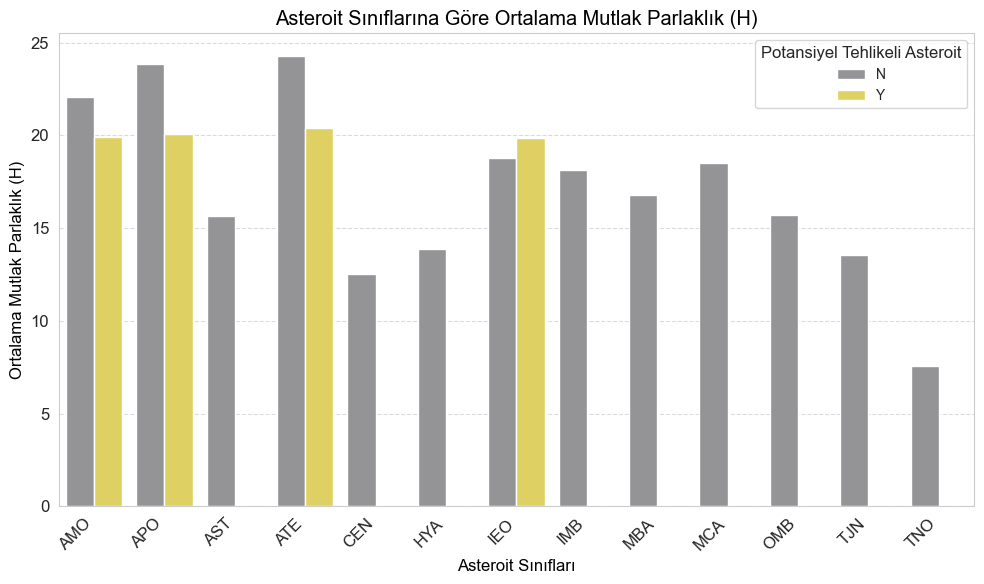

In [117]:
custom_palette = {"N": "#949398FF", "Y": "#F4DF4EFF"}
average_H_by_class = data.groupby(["class", "pha"])["H"].mean().reset_index()
plt.rc("font", family="sans-serif", weight="normal", size=12)
plt.figure(figsize=(10, 6))
sns.barplot(x="class", y="H", hue="pha", data=average_H_by_class, palette=custom_palette)
plt.xlabel("Asteroit Sınıfları", color="black")
plt.ylabel("Ortalama Mutlak Parlaklık (H)", color="black")
plt.title("Asteroit Sınıflarına Göre Ortalama Mutlak Parlaklık (H)", color="black")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Potansiyel Tehlikeli Asteroit",loc="upper right",fontsize=10,title_fontsize="12")
plt.tight_layout()
plt.show()

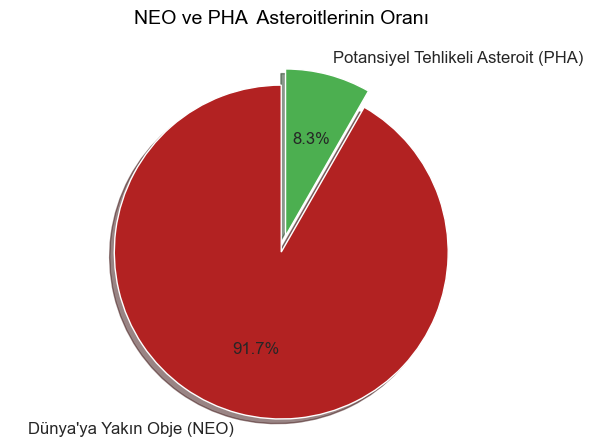

In [118]:
neo_count = data[data["neo"] == "Y"].shape[0]
pha_count = data[data["pha"] == "Y"].shape[0]

labels = ["Dünya'ya Yakın Obje (NEO)", "Potansiyel Tehlikeli Asteroit (PHA)"]
sizes = [neo_count, pha_count]
colors = ["#B22222", "#4CAF50"]
explode = (0, 0.1)

plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, explode=explode, shadow=True)
plt.title("NEO ve PHA  Asteroitlerinin Oranı", fontsize=14, color="black", pad=20)
plt.axis("equal")
plt.show()

In [119]:
data.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


Albedo, diameter ve diameter_sigma sütunlarının %85'inin boş olduğunu görüyoruz.

Bu üçü asteroitleri tehlikelerine göre sınıflandırmamız için gereken en önemli sütunlardan.

Sütunlardaki boş değerleri hesaplamanın herhangi bir yolu olmadığı için bu sütunların boş olduğu satırları siliyoruz.

In [120]:
new_data = data[(data["albedo"].isnull()==False) & (data["diameter"].isnull()==False)& (data["diameter_sigma"].isnull()==False)]

In [121]:
new_data.shape

(135005, 45)

In [122]:
new_data.isnull().any()

id                False
spkid             False
full_name         False
pdes              False
name               True
prefix             True
neo               False
pha               False
H                  True
diameter          False
albedo            False
diameter_sigma    False
orbit_id          False
epoch             False
epoch_mjd         False
epoch_cal         False
equinox           False
e                 False
a                 False
q                 False
i                 False
om                False
w                 False
ma                False
ad                False
n                 False
tp                False
tp_cal            False
per               False
per_y             False
moid              False
moid_ld           False
sigma_e           False
sigma_a           False
sigma_q           False
sigma_i           False
sigma_om          False
sigma_w           False
sigma_ma          False
sigma_ad          False
sigma_n           False
sigma_tp        

Makine öğrenmesi modelimiz için gerekli olmayan sütunları siliyoruz.


In [123]:
data_dropped = new_data.drop(["id","spkid","full_name","pdes","name","prefix","orbit_id","equinox","class","om","w","ma","per","per_y","sigma_e",
                              "sigma_a","sigma_q","sigma_i","sigma_om","sigma_w","sigma_ma","sigma_ad","sigma_n","sigma_tp","sigma_per"],axis=1,)

In [124]:
data_dropped.isnull().sum()

neo                  0
pha                  0
H                 3863
diameter             0
albedo               0
diameter_sigma       0
epoch                0
epoch_mjd            0
epoch_cal            0
e                    0
a                    0
q                    0
i                    0
ad                   0
n                    0
tp                   0
tp_cal               0
moid                 0
moid_ld              0
rms                  0
dtype: int64

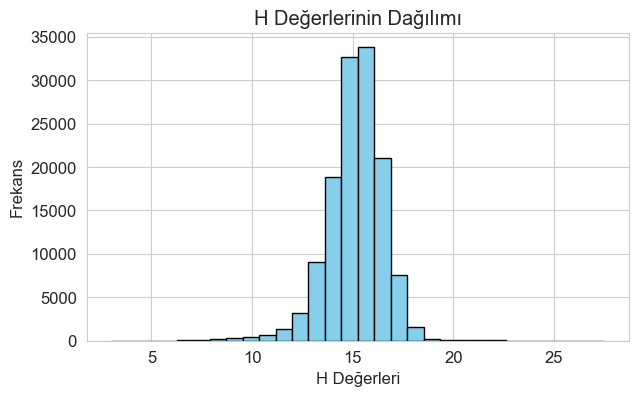

In [125]:
h_values = data_dropped["H"]

plt.figure(figsize=(7, 4))
plt.hist(h_values, bins=30, color="skyblue", edgecolor="black")
plt.title("H Değerlerinin Dağılımı")
plt.xlabel("H Değerleri")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

H, yani mutlak parlaklık parametrelerinin dağılımı normal dağılım tipinde olduğundan dolayı H değerlerini ortalama ile doldurabiliriz.

In [126]:
data_dropped["H"].fillna(data_dropped["H"].mean(), inplace=True)

In [127]:
data_dropped.isnull().sum().any()

False

In [128]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135005 entries, 0 to 909489
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             135005 non-null  object 
 1   pha             135005 non-null  object 
 2   H               135005 non-null  float64
 3   diameter        135005 non-null  float64
 4   albedo          135005 non-null  float64
 5   diameter_sigma  135005 non-null  float64
 6   epoch           135005 non-null  float64
 7   epoch_mjd       135005 non-null  int64  
 8   epoch_cal       135005 non-null  float64
 9   e               135005 non-null  float64
 10  a               135005 non-null  float64
 11  q               135005 non-null  float64
 12  i               135005 non-null  float64
 13  ad              135005 non-null  float64
 14  n               135005 non-null  float64
 15  tp              135005 non-null  float64
 16  tp_cal          135005 non-null  float64
 17  moid           

Veri setindeki pha ve neo değerlerini, modelin daha kolay anlayabilmesi için sayısal değerlere dönüştürüyoruz.

In [129]:
one_hot_encoded = pd.get_dummies(data_dropped, columns=["neo", "pha"])

In [130]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135005 entries, 0 to 909489
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   H               135005 non-null  float64
 1   diameter        135005 non-null  float64
 2   albedo          135005 non-null  float64
 3   diameter_sigma  135005 non-null  float64
 4   epoch           135005 non-null  float64
 5   epoch_mjd       135005 non-null  int64  
 6   epoch_cal       135005 non-null  float64
 7   e               135005 non-null  float64
 8   a               135005 non-null  float64
 9   q               135005 non-null  float64
 10  i               135005 non-null  float64
 11  ad              135005 non-null  float64
 12  n               135005 non-null  float64
 13  tp              135005 non-null  float64
 14  tp_cal          135005 non-null  float64
 15  moid            135005 non-null  float64
 16  moid_ld         135005 non-null  float64
 17  rms            

Veri setini önce bağımlı ve bağımsız değişken olarak ayırdık.

X bağımsız, y bağımlı değişken.

Sonra da bu değişkenleri test ve train olarak ayırdık.

In [131]:
X = one_hot_encoded.drop(["pha_Y","pha_N"], axis=1)
y = one_hot_encoded[["pha_Y", "pha_N"]]

In [139]:
ss = StandardScaler()
X_scaler = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

In [140]:
knn = KNeighborsClassifier()

In [141]:
knn_model = knn.fit(X_train, y_train)

Modelimize train değerleri üzerinden tahmin yaptırdık ve bu tahminlerin doğruluk puanını ölçtük.

In [142]:
y_train_pred = knn_model.predict(X_train)

In [143]:
accuracy_score(y_train, y_train_pred)

0.9990278137846746

Modele bu sefer daha önce hiç karşılaşmadığı veriler üzerinden tahmin yaptırıp doğruluk puanını ölçtük.

Modelimiz hem daha önce gördüğü verileri, hem de hiç bilmediği verileri doğru bir şekilde tahmin edebiliyor.

In [144]:
y_test_pred = knn_model.predict(X_test)

In [145]:
accuracy_score(y_test, y_test_pred)

0.9986667160475537